# 1. import library
disini penulis menuliskan library yang diperlukan untuk membangun model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report




# 2. Load dataset
Dataset yang digunakan dalam proyek ini diambil dari Kaggle: Student Depression Dataset https://www.kaggle.com/datasets/hopesb/student-depression-dataset, yang berisi informasi tentang kondisi mental mahasiswa dan faktor-faktor yang dapat berhubungan dengan depresi.

In [ ]:
# Set the path to the file you'd like to load
file_path = "student_depression_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/student-depression-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-2-f418da7953eb>:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy  

# 3. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) adalah proses awal yang sangat penting dalam analisis data yang bertujuan untuk memahami struktur dan pola dalam data sebelum melakukan analisis lebih lanjut. Langkah pertama dalam EDA adalah memahami tujuan analisis dan melihat data secara keseluruhan, termasuk memeriksa ukuran, jenis data, dan nilai yang hilang.

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.Profession.unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

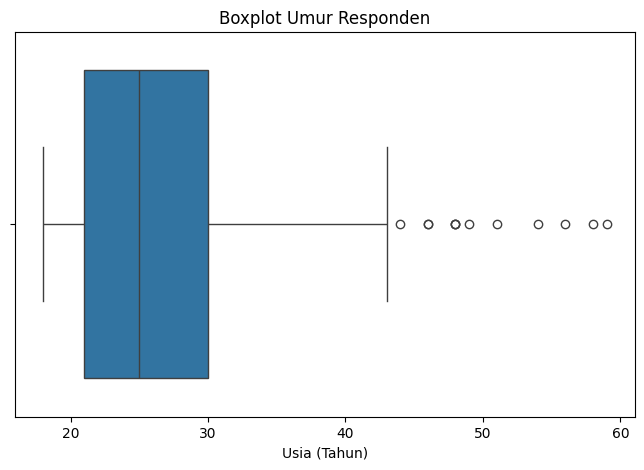

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age')
plt.title('Boxplot Umur Responden')
plt.xlabel('Usia (Tahun)')
plt.show()

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


# 4. Data Preparation
Data Preparation adalah langkah krusial dalam proses analisis data yang bertujuan untuk memastikan data siap digunakan dalam analisis atau pemodelan. Langkah pertama adalah pembersihan data, yang mencakup penanganan nilai yang hilang, duplikasi, dan outliers untuk memastikan kualitas data. Selanjutnya, transformasi data dilakukan, seperti normalisasi atau standarisasi untuk menyamakan skala data, serta pengkodean variabel kategorikal menjadi format numerik agar dapat digunakan dalam analisis.

In [ ]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data tanpa outlier
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# untuk kolom 'Age'
df = remove_outliers_iqr(df, 'Age')

In [ ]:
# Langkah 1: Membersihkan format Profesi (hilangkan tanda kutip)
df['Profession'] = df['Profession'].str.replace("'", "")

# Langkah 2: Menghitung jumlah data sebelum dihapus
print(f"Jumlah data sebelum filter: {len(df)}")

# Langkah 3: Menyimpan hanya baris dengan Profesi 'Student'
df.drop(df[df['Profession'] != 'Student'].index, inplace=True)

# Langkah 4: Reset index karena banyak baris terhapus
df.reset_index(drop=True, inplace=True)

# Langkah 5: Verifikasi hasil
print(f"Jumlah data setelah filter: {len(df)}")
df.Profession.unique()

Jumlah data sebelum filter: 27889
Jumlah data setelah filter: 27858


array(['Student'], dtype=object)

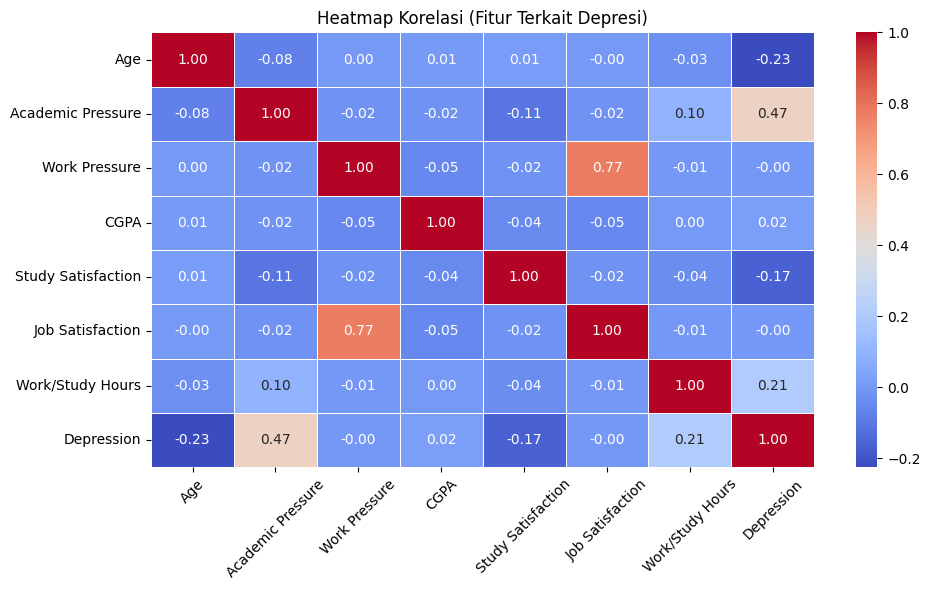

In [ ]:
# Ambil fitur numerik yang relevan
selected_features = [
    'Age', 'Academic Pressure', 'Work Pressure',
    'CGPA', 'Study Satisfaction', 'Job Satisfaction',
    'Work/Study Hours', 'Depression'
]

# Hitung korelasi hanya antar fitur tersebut
corr = df[selected_features].corr()

# Plot heatmap-nya
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Fitur Terkait Depresi)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


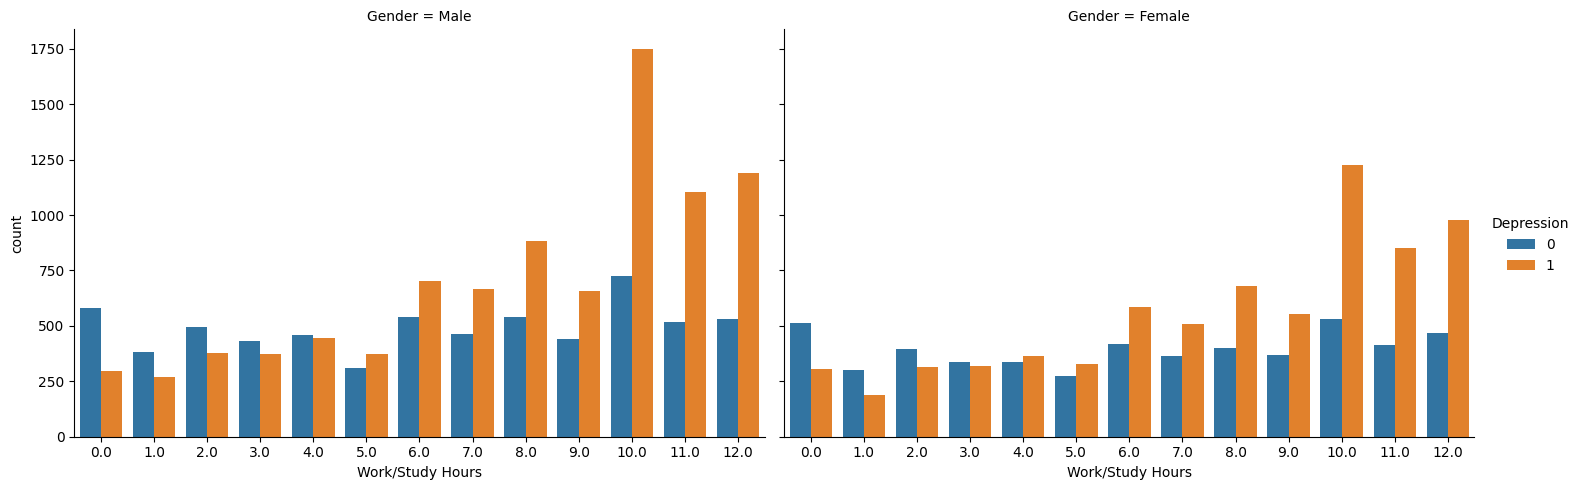

In [ ]:
sns.catplot(
    x='Work/Study Hours',
    hue='Depression',
    col='Gender',
    data=df,
    kind='count',
    aspect=1.5,   # lebar rasio antar kolom
    height=5      # tinggi plot (optional, bisa diubah juga)
)


  Family History of Mental Illness  Depression  Jumlah
0                               No           0    6330
1                               No           1    8049
2                              Yes           0    5222
3                              Yes           1    8257


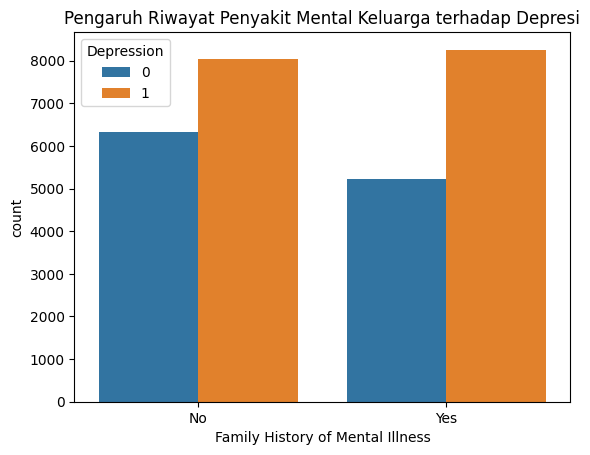

In [ ]:
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df)
plt.title('Pengaruh Riwayat Penyakit Mental Keluarga terhadap Depresi')

count = df.groupby(['Family History of Mental Illness', 'Depression']).size().reset_index(name='Jumlah')
print(count)


# 5. Membangun Model
**Membangun model** dalam analisis data adalah proses yang melibatkan pemilihan algoritma yang sesuai untuk menyelesaikan masalah tertentu, seperti prediksi atau klasifikasi. Langkah pertama adalah memilih algoritma yang tepat, tergantung pada jenis data dan tujuan analisis. Misalnya, untuk masalah klasifikasi, model seperti Logistic Regression atau Decision Tree dapat digunakan, sementara untuk prediksi numerik, algoritma regresi seperti Linear Regression atau Random Forest Regression lebih cocok. Setelah algoritma dipilih, data yang telah dibersihkan dan diformat dengan benar dibagi menjadi data pelatihan dan data pengujian. Data pelatihan digunakan untuk melatih model, sedangkan data pengujian digunakan untuk mengukur kinerja model setelah proses pelatihan. Proses pelatihan melibatkan penyesuaian parameter model agar dapat memprediksi atau mengklasifikasikan data dengan akurat. Setelah model dilatih, evaluasi dilakukan dengan menggunakan metrik seperti akurasi, precision, recall, atau RMSE untuk menentukan sejauh mana model dapat diandalkan dalam membuat prediksi pada data baru.


Accuracy: 0.761127063890883

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2296
           1       0.80      0.79      0.80      3276

    accuracy                           0.76      5572
   macro avg       0.75      0.75      0.75      5572
weighted avg       0.76      0.76      0.76      5572



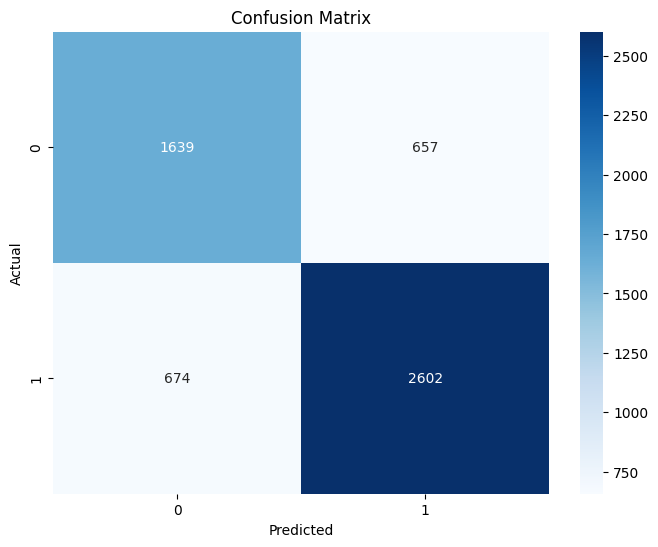

In [ ]:
## 1. Persiapan Data
# Pilih fitur berdasarkan analisis korelasi
selected_features = ['Academic Pressure', 'Age', 'Work/Study Hours', 'Study Satisfaction']
target = 'Depression'

# Create new features
df['Pressure_Hours_Ratio'] = df['Academic Pressure'] / (df['Work/Study Hours'] + 1)
df['Age_Study_Satisfaction'] = df['Age'] * df['Study Satisfaction']

# Updated feature list
enhanced_features = selected_features + ['Pressure_Hours_Ratio', 'Age_Study_Satisfaction']

# Membuat dataset baru dengan fitur terpilih
X = df[enhanced_features]
y = df[target]

# Split data training-testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Membangun Model
# Inisialisasi model Random Forest
best_params = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
# Unpack the dictionary using ** to pass parameters correctly
model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

# Training model
model.fit(X_train_scaled, y_train)

## 4. Evaluasi Model
# Prediksi pada data test
y_pred = model.predict(X_test_scaled)

# Hasil evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Hyperparameter tuning
Hyperparameter tuning adalah proses untuk menemukan nilai terbaik dari hyperparameter yang digunakan dalam model machine learning agar model dapat memberikan hasil yang optimal. Hyperparameter adalah parameter yang ditentukan sebelum proses pelatihan model dan mempengaruhi cara model belajar. Contoh hyperparameter termasuk jumlah pohon dalam Random Forest, kedalaman maksimum pohon dalam Decision Tree, atau nilai learning rate dalam Gradient Descent.

<ipython-input-16-f94d37ded7c8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


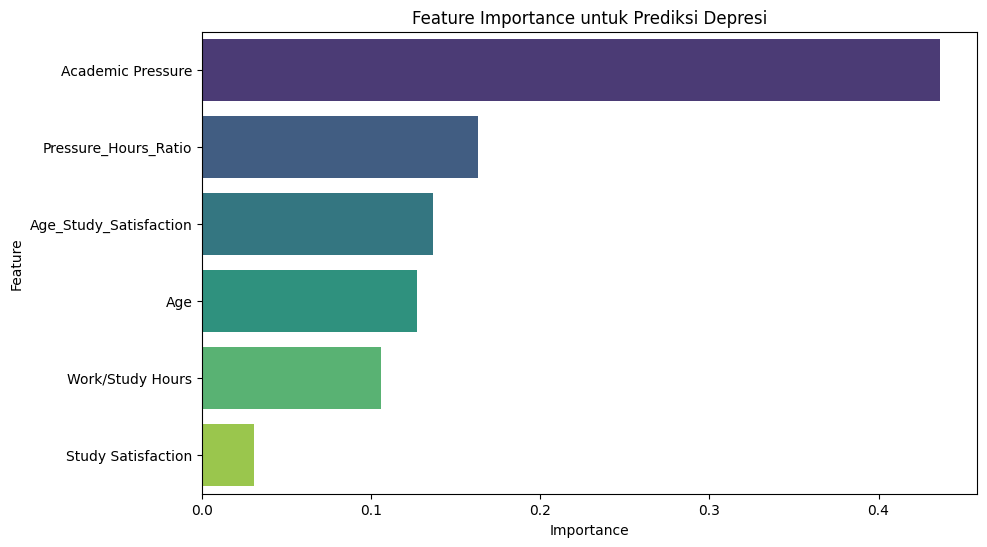


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
## 5. Analisis Feature Importance
# Mendapatkan importance score
feature_importance = pd.DataFrame({
    'Feature': enhanced_features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance untuk Prediksi Depresi')
plt.show()

## 6. Optimasi Model (Opsional)
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

In [ ]:
# 3. Train Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# 4. Evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# 5. Coefficients - PERBAIKAN DI SINI
print("\nFeature Coefficients:")
for feat, coef in zip(enhanced_features, model.coef_[0]):  # Gunakan enhanced_features
    print(f"{feat}: {coef:.4f}")

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2296
           1       0.82      0.77      0.79      3276

    accuracy                           0.77      5572
   macro avg       0.76      0.77      0.76      5572
weighted avg       0.77      0.77      0.77      5572


Feature Coefficients:
Academic Pressure: 1.1179
Age: -0.4111
Work/Study Hours: 0.4142
Study Satisfaction: -0.0979
Pressure_Hours_Ratio: -0.0277
Age_Study_Satisfaction: -0.2493


Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      2296
           1       0.77      0.74      0.76      3276

    accuracy                           0.72      5572
   macro avg       0.71      0.71      0.71      5572
weighted avg       0.72      0.72      0.72      5572



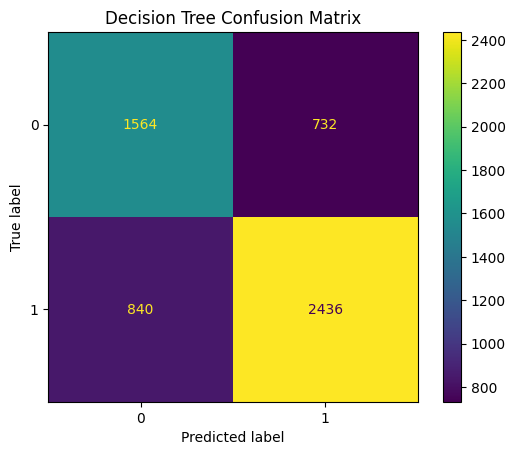


Feature Importances:
Academic Pressure: 0.4716
Age: 0.1585
Work/Study Hours: 0.1037
Study Satisfaction: 0.0138
Pressure_Hours_Ratio: 0.0882
Age_Study_Satisfaction: 0.1641


In [ ]:
# 3. Train Model
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # pakai class_weight jika imbalance
tree_model.fit(X_train_scaled, y_train)

# 4. Evaluate
y_pred_tree = tree_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))

# 5. Visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(tree_model, X_test_scaled, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# 6. Feature Importances
print("\nFeature Importances:")
for feat, imp in zip(enhanced_features, tree_model.feature_importances_):
    print(f"{feat}: {imp:.4f}")


 # 7. model testing
 Mencoba mentesting model dengan data baru agar bisa mengevaluasi model

In [ ]:
# Contoh data baru untuk prediksi
new_data = pd.DataFrame({
    'Academic Pressure': [3.5],
    'Age': [22],
    'Work/Study Hours': [8],
    'Study Satisfaction': [2.5]
})

# Create new features for the new data as well:
new_data['Pressure_Hours_Ratio'] = new_data['Academic Pressure'] / (new_data['Work/Study Hours'] + 1)
new_data['Age_Study_Satisfaction'] = new_data['Age'] * new_data['Study Satisfaction']


# Preprocess data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi
prediction = best_model.predict(new_data_scaled)
print("\nPrediksi Depresi untuk Data Baru:", prediction)


Prediksi Depresi untuk Data Baru: [1]
